## Importation d'un fichier .FIT et lecture de premières données

In [ ]:
from fitparse import FitFile
import pandas as pd
import matplotlib.pyplot as plt

# Chargement d'un fichier FIT
fitfile = FitFile("../data/raw/16594808988_ACTIVITY.fit")

# Informations générales sur le fichier
print(f"Nombre total de messages dans le fichier : {len(list(fitfile.get_messages()))}")
print("Types de messages disponibles :")
types = set([m.name for m in fitfile.get_messages()])
print(types)

liste = []
for type in types:
    if type[:7] == 'unknown':
        liste.append(int(type[8:]))
liste.sort()
print(liste)

Nombre total de messages dans le fichier : 51476
Types de messages disponibles :
{'unknown_288', 'unknown_13', 'gps_metadata', 'file_creator', 'unknown_317', 'device_settings', 'unknown_22', 'unknown_326', 'zones_target', 'unknown_325', 'unknown_104', 'unknown_233', 'unknown_140', 'unknown_324', 'file_id', 'session', 'sport', 'unknown_79', 'unknown_394', 'training_file', 'unknown_312', 'lap', 'device_info', 'record', 'unknown_113', 'activity', 'user_profile', 'unknown_141', 'event', 'unknown_327', 'unknown_313', 'unknown_147', 'unknown_216', 'hrv'}
[13, 22, 79, 104, 113, 140, 141, 147, 216, 233, 288, 312, 313, 317, 324, 325, 326, 327, 394]


## Exploration d'un message spécifique

In [ ]:
# Exploration des messages 'record'
records = fitfile.get_messages('record')

# Affichage des premiers champs du premier message
for record in records:
    for field in record:
        print(f"{field.name:20} | {field.value} {field.units or ''}")
    break

accumulated_power    | 77 watts
activity_type        | running 
cadence              | 58 rpm
distance             | 2.25 m
enhanced_altitude    | 1931.4 m
enhanced_speed       | 0.448 m/s
fractional_cadence   | 0.0 rpm
heart_rate           | 129 bpm
position_lat         | 542986482 semicircles
position_long        | 79907780 semicircles
power                | 77 watts
stance_time          | 482.0 ms
stance_time_balance  | 49.09 percent
stance_time_percent  | 43.5 percent
step_length          | 631.0 mm
timestamp            | 2024-07-26 07:00:09 
vertical_oscillation | 57.5 mm
vertical_ratio       | 2.21 percent
unknown_107          | 0 
unknown_134          | 100 
unknown_135          | 65 
unknown_136          | 114 
unknown_137          | 99 
unknown_138          | 99 
unknown_140          | 448 
unknown_143          | 67 
unknown_144          | 129 
unknown_87           | 0 


## Extraction des enregistrements dans un dataframe

In [ ]:
# Rechargement des messages
records = fitfile.get_messages('record')

# Stockage des enregistrements dans une liste
data = []
for record in records:
    record_values = {}
    for field in record:
        record_values[field.name] = field.value
    data.append(record_values)

df = pd.DataFrame(data)
df.head()

,accumulated_power,activity_type,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,...,unknown_135,unknown_136,unknown_137,unknown_138,unknown_140,unknown_143,unknown_144,unknown_87,unknown_108,unknown_90
0,77,running,58,2.25,1931.4,0.448,0.0,129,542986482,79907780,...,65,114,99,99,448,67,129,0.0,NaN,NaN
1,156,running,59,4.62,1931.4,0.000,0.0,114,542986379,79908129,...,69,114,99,99,0,67,127,0.0,NaN,NaN
2,368,running,62,7.19,1931.4,2.109,0.0,114,542986353,79908533,...,69,114,99,99,2109,67,127,0.0,NaN,NaN
3,666,running,85,11.10,1931.4,2.314,0.0,114,542986341,79909209,...,69,114,99,99,2314,67,128,0.0,NaN,NaN
4,966,running,88,15.36,1931.6,2.529,0.5,115,542986402,79909760,...,20,115,99,99,2529,67,130,0.0,NaN,NaN


## Nettoyage et conversions

In [ ]:
# Convertir les timestamps en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Convertir la vitesse en km/h si elle existe
if 'enhanced_speed' in df.columns:
    df['speed_kmh'] = df['enhanced_speed'] * 3.6

# Supprimer les colonnes entièrement vides
df.dropna(axis=1, how='all', inplace=True)

df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11498 entries, 0 to 11497
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   accumulated_power     11498 non-null  int64         
 1   activity_type         11498 non-null  object        
 2   cadence               11498 non-null  int64         
 3   distance              11498 non-null  float64       
 4   enhanced_altitude     11498 non-null  float64       
 5   enhanced_speed        11498 non-null  float64       
 6   fractional_cadence    11498 non-null  float64       
 7   heart_rate            11498 non-null  int64         
 8   position_lat          11498 non-null  int64         
 9   position_long         11498 non-null  int64         
 10  power                 11498 non-null  int64         
 11  stance_time           10655 non-null  float64       
 12  stance_time_balance   10573 non-null  float64       
 13  stance_time_perc

,count,mean,min,25%,50%,75%,max,std
accumulated_power,11498.0,1801515.218647,77.0,1030627.0,1789534.0,2643727.25,3306986.0,947430.257986
cadence,11498.0,70.318403,0.0,54.0,82.0,86.0,118.0,19.5194
distance,11498.0,14784.728476,2.25,7065.9475,15642.475,22523.085,28401.52,8362.637581
enhanced_altitude,11498.0,2127.219986,1654.4,1918.3,2128.7,2301.8,2689.6,269.435883
enhanced_speed,11498.0,2.474297,0.0,1.428,2.435,3.49,5.598,1.130244
fractional_cadence,11498.0,0.250043,0.0,0.0,0.5,0.5,0.5,0.250011
heart_rate,11498.0,172.340581,114.0,170.0,174.0,177.0,185.0,7.140377
position_lat,11498.0,543020504.213254,542667469.0,542798581.25,542977707.5,543219638.25,543390326.0,222921.636078
position_long,11498.0,80172604.91816,79799515.0,80061234.5,80160583.0,80333581.5,80489305.0,184288.427799
power,11498.0,287.61402,0.0,248.0,292.0,341.0,721.0,91.874247


## Visualisation simple

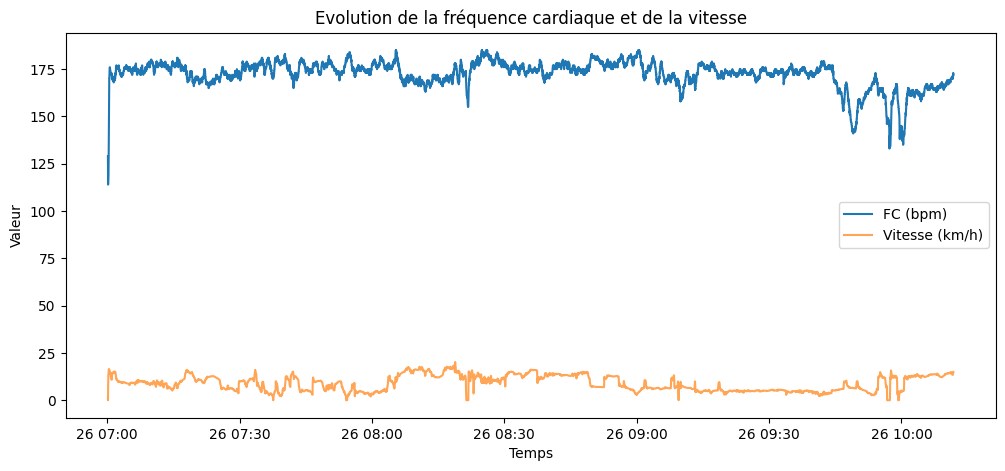

In [ ]:
# Vitesse et fréquence cardiaque en fonction du temps
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['heart_rate'], label='FC (bpm)')
if 'speed_kmh' in df.columns:
    plt.plot(df['timestamp'], df['speed_kmh'], label='Vitesse (km/h)', alpha=0.7)
plt.legend()
plt.title("Evolution de la fréquence cardiaque et de la vitesse")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show()

## Exploration d'autres messages

In [ ]:
for msg_type in ['lap', 'session', 'event']:
    print(f"\n--- {msg_type.upper()} ---")
    for m in fitfile.get_messages(msg_type):
        for f in m:
            print(f"{f.name:25} | {f.value} {f.units or ''}")
        print("-" * 40)


--- LAP ---
avg_cadence_position      | (None, None) rpm
avg_combined_pedal_smoothness | None percent
avg_fractional_cadence    | 0.890625 rpm
avg_heart_rate            | 171 bpm
avg_left_pco              | None mm
avg_left_pedal_smoothness | None percent
avg_left_power_phase      | (None, None, None, None) degrees
avg_left_power_phase_peak | (None, None, None, None) degrees
avg_left_torque_effectiveness | None percent
avg_power                 | 403 watts
avg_power_position        | (None, None) watts
avg_right_pco             | None mm
avg_right_pedal_smoothness | None percent
avg_right_power_phase     | (None, None, None, None) degrees
avg_right_power_phase_peak | (None, None, None, None) degrees
avg_right_torque_effectiveness | None percent
avg_running_cadence       | 84 strides/min
avg_speed                 | None m/s
avg_stance_time           | 270.2 ms
avg_stance_time_balance   | 50.09 percent
avg_stance_time_percent   | 38.07 percent
avg_step_length           | 1054.8 mm
avg_s

In [ ]:
from datetime import datetime

date = datetime.today()
date

datetime.datetime(2025, 10, 12, 14, 43, 13, 443653)